#**Задание 1. Обнаружение и обработка пропущенных значенийДатасет: titanic (пассажиры Титаника)**
Источник: seaborn.load_dataset("titanic")
Инструкции:
1. Загрузите датасет titanic
2. Определите количество пропущенных значений в каждом столбце.
3. Визуализируйте пропуски с помощью библиотеки missingno .
4. Заполните пропущенные значения:
признак age — средним значением;
признак embarked — наиболее частым значением;
признак deck — удалите.
5. Отобразите информацию о таблице до и после обработки ( .info() ,
.isna().sum() ).

Количество пропущенных значений в каждом столбце:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<Figure size 1000x500 with 0 Axes>

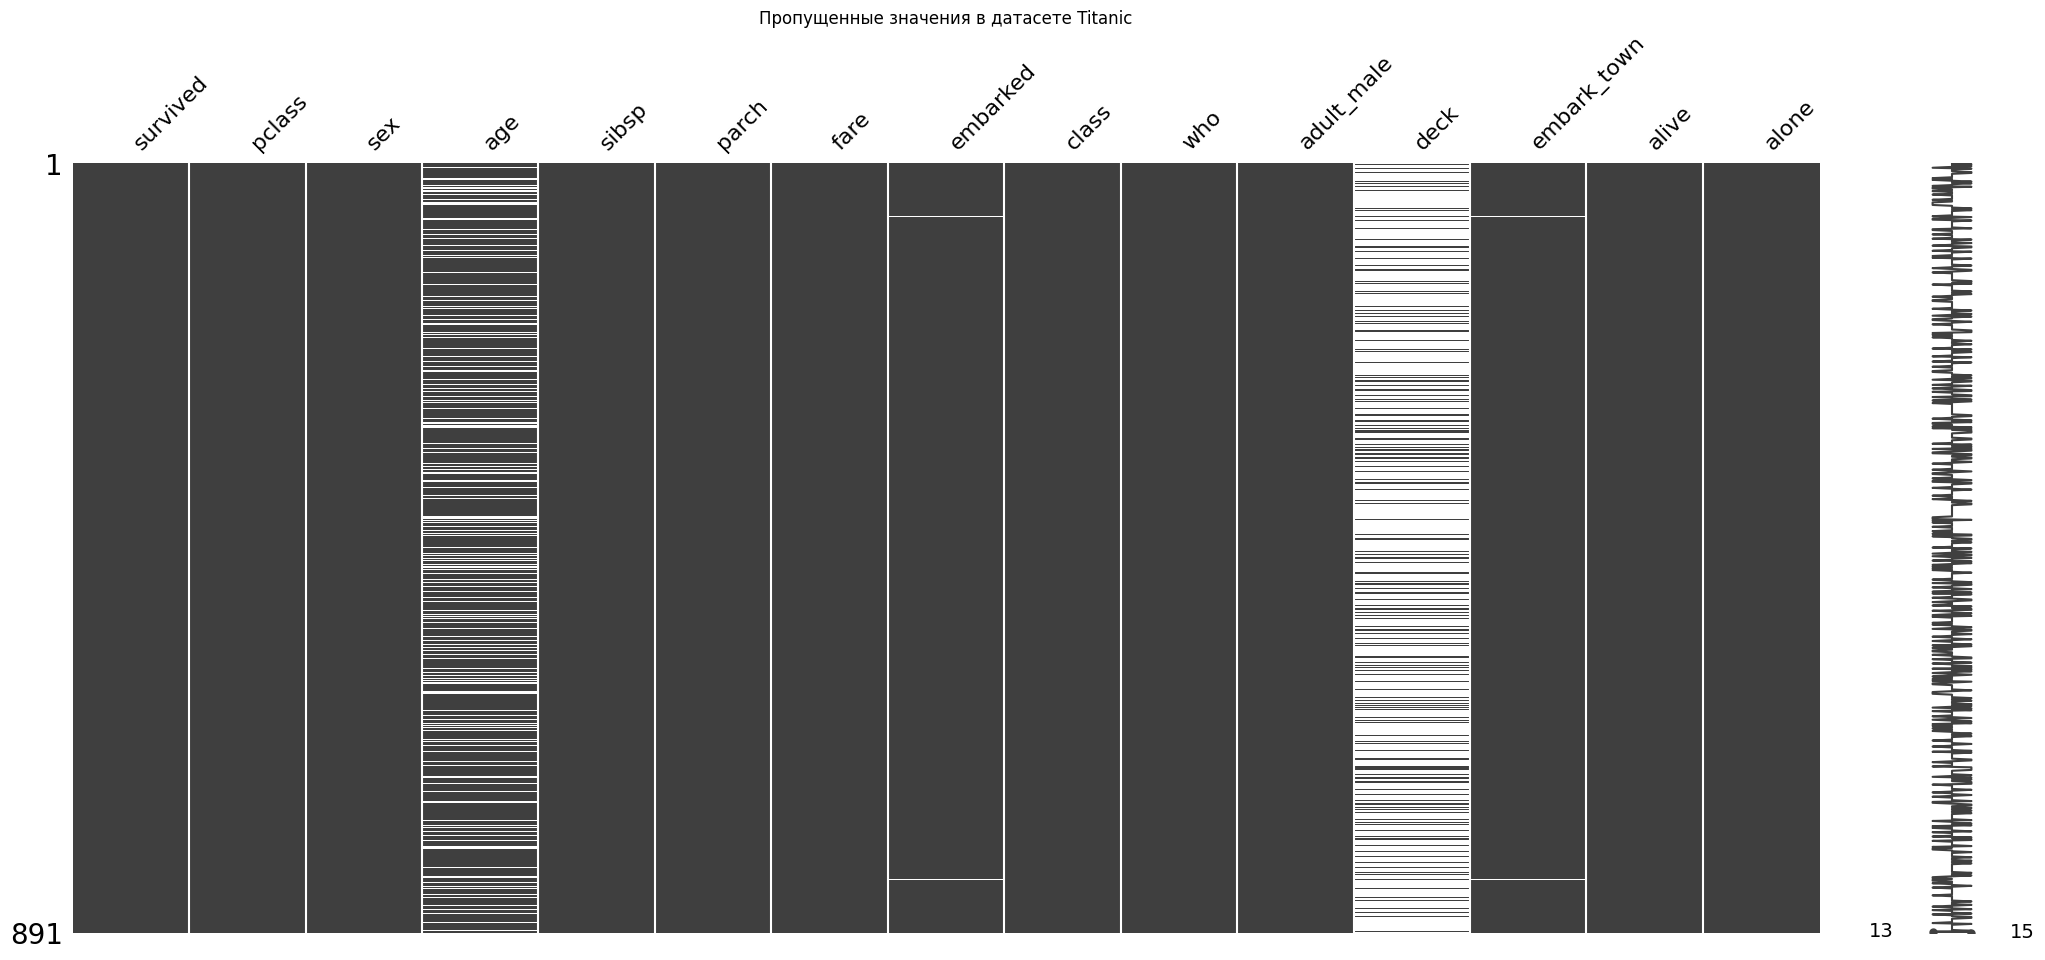


Информация о таблице до обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None

Количество пропущенных значений после обработки:
survived       0
pclass        

<ipython-input-1-73464d055fa5>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)
<ipython-input-1-73464d055fa5>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
missing_values = titanic.isna().sum()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)
plt.figure(figsize=(10, 5))
msno.matrix(titanic)
plt.title('Пропущенные значения в датасете Titanic')
plt.show()
titanic['age'].fillna(titanic['age'].mean(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
if 'deck' in titanic.columns:
    titanic.drop(columns=['deck'], inplace=True)
print("\nИнформация о таблице до обработки:")
print(titanic.info())
print("\nКоличество пропущенных значений после обработки:")
print(titanic.isna().sum())


#**Задание 2. Обнаружение и удаление выбросов**
Датасет: penguins (описание антарктических пингвинов)
Источник: seaborn.load_dataset("penguins")
Инструкции:

1. Загрузите датасет penguins .
2. Постройте boxplot-графики для признаков bill_length_mm , bill_depth_mm ,
flipper_length_mm , body_mass_g .
3. Используя метод межквартильного размаха (IQR), выявите и удалите выбросы
по каждому из указанных признаков.
4. Сравните размеры датасета до и после фильтрации.
5. Постройте boxplot-график до и после удаления выбросов для одного из
признаков.

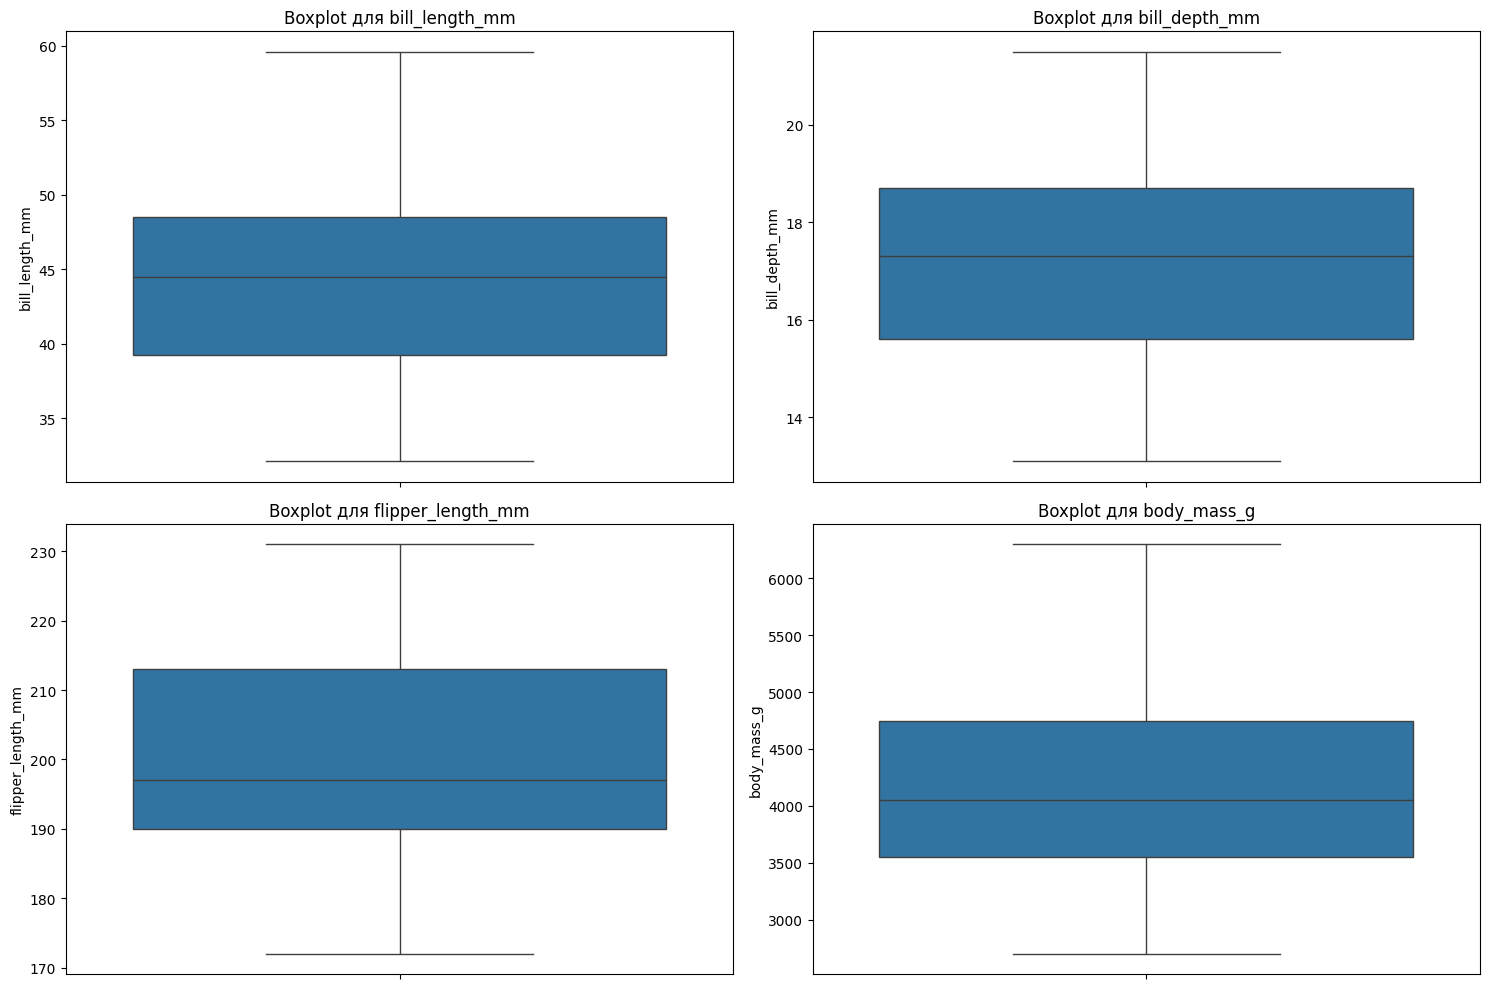

Размер датасета до удаления выбросов: 344
Размер датасета после удаления выбросов: 342


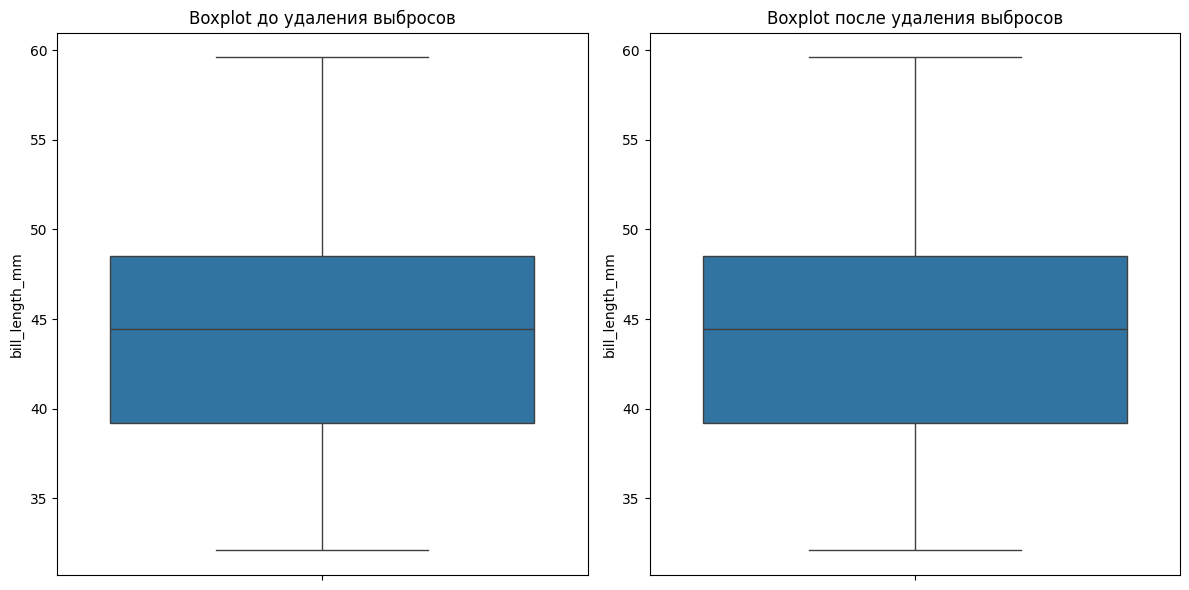

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=penguins[feature])
    plt.title(f'Boxplot для {feature}')
plt.tight_layout()
plt.show()
def remove_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
for feature in features:
    penguins = remove_outliers(penguins, feature)
print(f'Размер датасета до удаления выбросов: {len(sns.load_dataset("penguins"))}')
print(f'Размер датасета после удаления выбросов: {len(penguins)}')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=sns.load_dataset("penguins")['bill_length_mm'])
plt.title('Boxplot до удаления выбросов')
plt.subplot(1, 2, 2)
sns.boxplot(y=penguins['bill_length_mm'])
plt.title('Boxplot после удаления выбросов')
plt.tight_layout()
plt.show()


#**Задание 3. Масштабирование числовых признаков**
Датасет: california housing
Источник: from sklearn.datasets import fetch_california_housing
Инструкции:

1. Загрузите данные с помощью fetch_california_housing(as_frame=True) .
2. Преобразуйте данные в pandas.DataFrame .
3. Выполните:
стандартизацию признаков с помощью StandardScaler ;
нормализацию в диапазон [0, 1] с помощью MinMaxScaler (на копии
таблицы).
4. Постройте гистограммы распределения признака MedInc до и после
масштабирования.
5. Сравните поведение шкал на гистограммах.

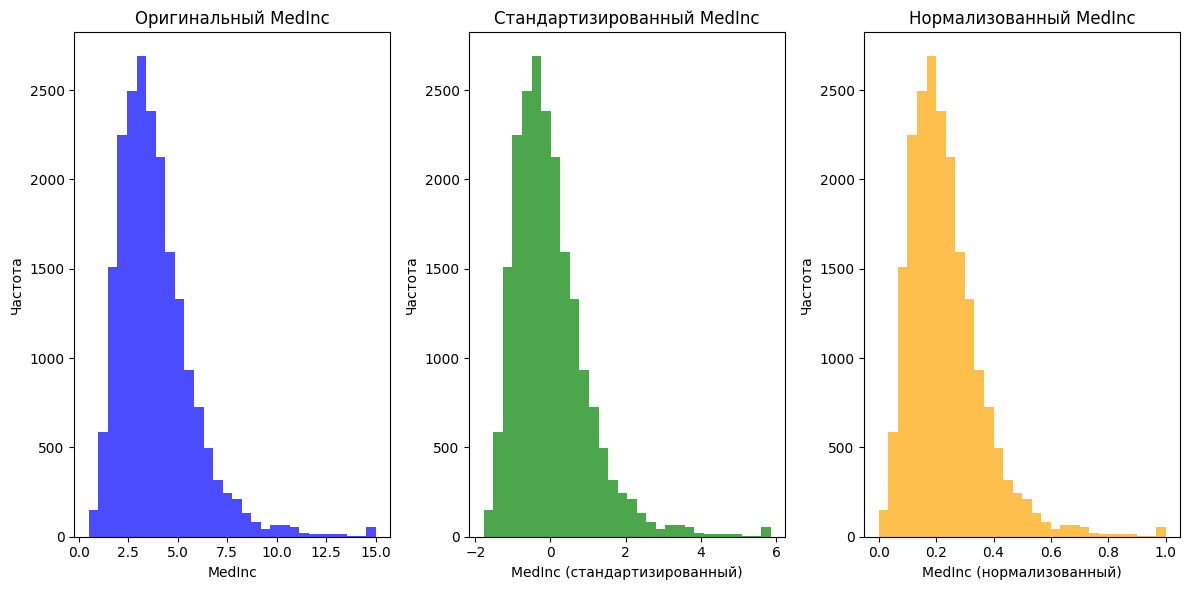

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
scaler = StandardScaler()
df['MedInc_standardized'] = scaler.fit_transform(df[['MedInc']])
minmax_scaler = MinMaxScaler()
df['MedInc_normalized'] = minmax_scaler.fit_transform(df[['MedInc']])
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=30, color='blue', alpha=0.7)
plt.title('Оригинальный MedInc')
plt.xlabel('MedInc')
plt.ylabel('Частота')
plt.subplot(1, 3, 2)
plt.hist(df['MedInc_standardized'], bins=30, color='green', alpha=0.7)
plt.title('Стандартизированный MedInc')
plt.xlabel('MedInc (стандартизированный)')
plt.ylabel('Частота')
plt.subplot(1, 3, 3)
plt.hist(df['MedInc_normalized'], bins=30, color='orange', alpha=0.7)
plt.title('Нормализованный MedInc')
plt.xlabel('MedInc (нормализованный)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


#**Задание 4. Кодирование категориальных признаков**
Датасет: adult (перепись населения США, income dataset)
Источник: https://archive.ics.uci.edu/ml/datasets/adult
Или через библиотеку sklearn.datasets.fetch_openml("adult")
Инструкции:
1. Загрузите данные и отберите признаки:
категориальные: education , marital-status , occupation ;
целевой признак: income .
2. Проведите Label Encoding для признака education , предполагая, что уровни
образования упорядочены.
3. Примените One-Hot Encoding к признакам marital-status и occupation .
4. Проверьте итоговую размерность таблицы до и после кодирования.
5. Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
adult_data = fetch_openml("adult", version=2, as_frame=True)
df = adult_data.frame
print("Доступные столбцы в датасете:")
print(df.columns.tolist())
print("\nПервые 5 строк DataFrame:")
print(df.head())
try:
    df = df[['education', 'marital-status', 'occupation', 'class']]
except KeyError as e:
    print(f"Ошибка: {e}. Проверьте названия столбцов.")
education_ordered = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
    '10th', '11th', '12th', 'HS-grad', 'Some-college',
    'Bachelors', 'Masters', 'Doctorate'
]
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df = pd.get_dummies(df, columns=['marital-status', 'occupation'], drop_first=True)
print("Размерность до кодирования:", df.shape[0], "строк и", df.shape[1], "столбцов")
print("Размерность после кодирования:", df.shape[0], "строк и", df.shape[1], "столбцов")
dummy_columns = [col for col in df.columns if 'marital-status_' in col or 'occupation_' in col]
print("Проверка на дамми-ловушку:")
print(df[dummy_columns].sum(axis=1).value_counts())

Доступные столбцы в датасете:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

Первые 5 строк DataFrame:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband

<ipython-input-6-65123e695d97>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_encoded'] = label_encoder.fit_transform(df['education'])
